<a href="https://colab.research.google.com/github/Manuelstv/metodos-computacionais-B/blob/main/prova_met_comp_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pylab as pl
import random

In [ ]:
def gerador():
  global seed
  a = 1029;
  c = 221591;
  b = 1048576
  seed = (seed*a + c) % b
  
  return  float(seed)/b

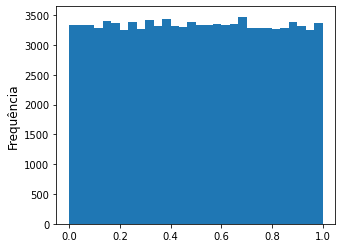

In [ ]:
#Testando se o gerador realmente é confiavel
seed = 3289382938
A = []
for i in range (0,10**5):
  A.append(gerador())

fig, ax = plt.subplots(figsize=(5,4))
ax.hist(A, bins = 30)
ax.set_ylabel("Frequência",fontsize =12)
ax=ax

**Questão 1.** Pesquisa de opinião


A Datafolha realizou uma pesquisa nos dias 11 e 12 maio deste ano a respeito do impeachment do
presidente Jair Bolsonaro, entrevistando presencialmente 2071 pessoas em todo o Brasil. A favor ao
impeachment se manifestaram 49% dos entrevistados, ante 46% que se dizem contrários à saída dele
do cargo dessa forma. Segundo o instituto, **a margem de erro é de dois pontos percentuais** , para mais
ou para menos, com **nível de confiança de 95%**.
(a) Supondo um processo binomial com probabilidade p = 0.49 (a favor do impeachment), simule a
entrevista de 2071 pessoas. Repetindo a pesquisa 1000 vezes, faça um histograma (Fig.1) com os resultados na forma de percentual de respondentes a favor.
(b) Compare os valores de sua estatística simulada (percentual médio de respondentes a favor do impeachment e erro percentual dentro do intervalo de confiança de 95%) com os valores da Datafolha.

Intervalo de confiança estimado = 95%


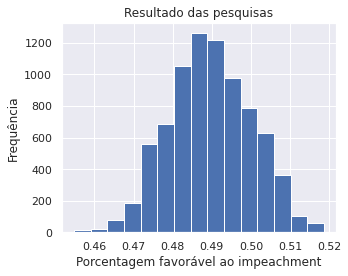

In [ ]:
#numero de pessoas entrevistadas
num_pessoas = 2071
#inicialização das variaveis
favoraveis = 0
outro = 0
#probabilidade de um individuo ser favoravel ao impeachment
prob_impeachment = 0.49
#numero de simulações do experimento
N_simulacoes = 1000
#lista que armazena o numero de inidividuos favoraveis em cada experimento
favoraveis_list = []
#variavel que conta quantas vezes o resultado foi fora do intervalo de confiança
intervalo = 0
random.seed(1)

for j in range(0, N_simulacoes):
  a_favor = 0
  outro = 0
  for i in range(0,num_pessoas):
    x = random.random()
    if (x<=0.49):
      a_favor +=1
    else: 
      outro +=1

  if (a_favor/num_pessoas<prob_impeachment+0.02 and a_favor/num_pessoas>prob_impeachment-0.02):
    intervalo +=1
  favoraveis_array.append(a_favor/num_pessoas)

sns.set()
fig, ax = plt.subplots(figsize=(5,4))
ax.hist(favoraveis_array, bins = 15)
ax.set_ylabel("Frequência",fontsize =12)
ax.set_xlabel("Porcentagem favorável ao impeachment", fontsize =12)
ax.set_title("Resultado das pesquisas", fontsize =12)
fig.tight_layout()
fig.savefig("histograma")
fig.show()

print("Intervalo de confiança estimado = {0:.0%}".format(intervalo/N_simulacoes))

Questão 2:

Estimar área usando o método de Monte Carlo.

Temos 

(eq. 1)   y = 2(x-4)^2 +4 

(eq. 2)   y = -3(x-4)^2-3

(eq. 3)   (x+197)^2+y^2 =200^2

(eq. 4)   (x-205)^2+y^2= 200^2

Elevando (1) ao quadrado e colocando em 3, encontramos (x = 2.8964, y = 6.4359).(interseção da curva (1) com (3))

Elevando (1) ao quadrado e colocando em (4), encontramos (x = 5.1036, y = 6.4359), (interseção da curva (1) com (4))

Elevando (2) ao quadrado e colocando em 4, encontramos (x = 5.1127, y = -6.7143).(interseção da curva (1) com (4))

Elevando (2) ao quadrado e colocando em (3), encontramos (x = 2.8873, y =  -6.7143).(interseção da curva (1) com (4))

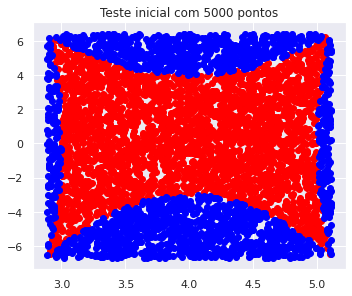

In [ ]:
#inicialização da variavel área
area = 0
#numero de pontos usados para estimar a area
num_pontos = 5000
#listas que armazenam coordenadas dos pontos DENTRO da area delimitada
A_x = [];A_y =[];
#listas que armazenam coordenadas dos pontos FORA da area delimitada
B_x=[];B_y = [];

for i in range (0,num_pontos):
  y = random.uniform(-6.7143,6.4359)
  x = random.uniform(2.8873,5.1127)
  if (y<2*(x-4)**2+4 and y>-3*(x-4)**2-3 and (x+197)**2+y**2>200**2 and (x-205)**2+y**2>200**2):
    area +=1
    A_x.append(x)
    A_y.append(y)
  else:
    B_x.append(x)
    B_y.append(y)

fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(A_x,A_y, color ="red")
ax.scatter(B_x,B_y, color ="blue")
fig.tight_layout()
ax.set_title("Teste inicial com 5000 pontos")
fig.savefig("2a")

Aqui vamos determinar como a estimativa da area pelo método de monte carlo varia conforme o numero de pontos utilizado.

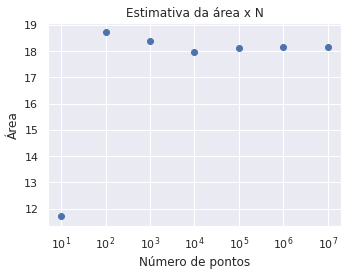

In [ ]:
A_x = []; A_y =[];
B_x=[]; B_y = [];
area = []
num_pontos_list = []
area_retangulo = (6.4359+6.7143)*(5.1127-2.8873)

for N in range (1,8):
  num_pontos = 10**N
  hit = 0
  for i in range (0,num_pontos):
    y = random.uniform(-6.7143,6.4359)
    x = random.uniform(2.8873,5.1127)
    if (y<2*(x-4)**2+4 and y>-3*(x-4)**2-3 and (x+197)**2+y**2>200**2 and (x-205)**2+y**2>200**2):
      #acertou
      hit +=1
      A_x.append(x)
      A_y.append(y)
    else:
      #errou
      B_x.append(x)
      B_y.append(y)
  area.append(hit*area_retangulo/num_pontos)
  num_pontos_list.append(num_pontos)

fig, ax = plt.subplots(figsize=(5,4))
ax.set_xscale('log')
ax.set_ylabel("Área")
ax.set_xlabel("Número de pontos")
ax.set_title("Estimativa da área x N")
ax.scatter(num_pontos_list, area)
fig.tight_layout()
fig.savefig("2b")

2c)

In [ ]:
def hit_and_miss(x,y,hit,hit_x,hit_y, miss_x,miss_y):
  if (y<2*(x-4)**2+4 and y>-3*(x-4)**2-3 and (x+197)**2+y**2>200**2 and (x-205)**2+y**2>200**2):
  #acertou
    hit +=1
    hit_x.append(x)
    hit_y.append(y)
  else:
    #errou
    miss_x.append(x)
    miss_y.append(y)
  return hit,hit_x,hit_y, miss_x,miss_y

Comparação da estimativa da area em função do número de pontos usando:

(i) A função random do Python.

(ii) A função criada por nós.

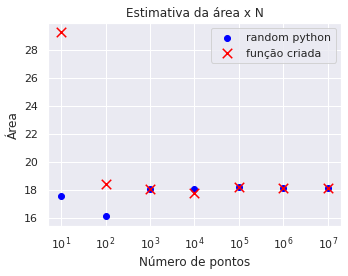

In [ ]:
#listas para o random do numpy
hit_x = []; hit_y =[]; miss_x=[]; miss_y = [];
#listas para o random feito por nós pelo método da conguencia
hit_x_cong = [];hit_y_cong =[]; miss_x_cong=[]; miss_y_cong = [];
area = []; area_cong = []; num_pontos_array = [];
area_retangulo = (6.4359+6.7143)*(5.1127-2.8873)      
seed = 3289382938

for N in range (1,8):
  num_pontos = 10**N
  hit = 0
  hit_cong = 0
  for i in range (0,num_pontos):
    y = random.uniform(-6.7143,6.4359)
    x = random.uniform(2.8873,5.1127)
    y_cong = gerador()*(6.4359+6.7143)-6.7143
    x_cong = gerador()*(5.1127-2.8873)+2.8873
    hit,hit_x,hit_y, miss_x,miss_y = hit_and_miss(x,y,hit,hit_x,hit_y, miss_x,miss_y)
    hit_cong,hit_x_cong,hit_y_cong, miss_x_cong,miss_y_cong = hit_and_miss(x_cong,y_cong,hit_cong,hit_x_cong,hit_y_cong, miss_x_cong,miss_y_cong)
  area.append(hit*area_retangulo/num_pontos)
  area_cong.append(hit_cong*area_retangulo/num_pontos)
  num_pontos_array.append(num_pontos)

fig, ax = plt.subplots(figsize=(5,4))
ax.set_xscale('log')
ax.set_ylabel("Área")
ax.set_xlabel("Número de pontos")
ax.set_title("Estimativa da área")
ax.scatter(num_pontos_array, area, label = "random python", color ='blue', marker ='o')
ax.scatter(num_pontos_array, area_cong,marker ='x',s=90, color ='red', label = "função criada")
fig.tight_layout()
ax.legend()
fig.savefig("2b")

3)

In [ ]:
def coincidencia(A):
  for i in A:
    if (A.count(i)>1):
      return True

In [ ]:
aniversarios = []
N_pessoas = 23
#exemplos:  seed = 11, dá repetido (N=23); seed =10 não dá
random.seed(10)
for i in range (0,N_pessoas):
  x = random.randint(1,365)
  aniversarios.append(x)
if (coincidencia(aniversarios)):
  print("pelo menos duas pessoas fazem aniversário no mesmo dia")
print(aniversarios)

[293, 17, 220, 248, 296, 8, 106, 237, 252, 143, 335, 83, 18, 267, 251, 168, 39, 128, 185, 23, 216, 72, 309]


sera que p(N = 23) approx 0.5?

In [ ]:
N_pessoas = 23
contagem = 0
M = 100
random.seed(12)
for m in range (0,M):
  aniversarios = []
  for i in range (0,N_pessoas):
    x = random.randint(1,365)
    aniversarios.append(x)
  if (coincidencia(aniversarios)):
    contagem +=1
print("Probabilidade estimada de duas pessoas fazerem aniversário no mesmo dia =", contagem/M)

Probabilidade estimada de duas pessoas fazerem aniversário no mesmo dia = 0.49


Questão bonus

In [ ]:
#Estamos lidando com fatoriais muito grandes, por isso usamos log(a*b) = log(a)+log(b) para lidar os fatoriais
def probabilidade_teorica(N):
  H = 0
  I = 0
  for i in range(1,365+1):
    H = np.log(i)+H
  for j in range(1,(365-N)+1):
    I = np.log(j)+I
  return (1-np.exp(H-I-N*np.log(365)))

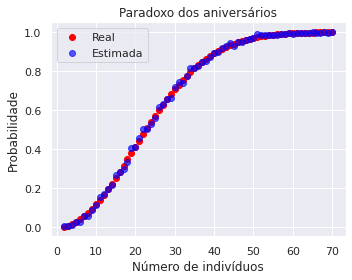

In [ ]:
M =1000
aniversarios = []
probabilidade = []
probabilidade_teorica_array = []
N_pessoas_array = []
random.seed(2)
#loop sobre numero de inidividuos
for N_pessoas in range (2,70+1):
  #Repeticoes do experimento
  contagem = 0
  for m in range (1,M+1):
    aniversarios = []
    #gerar aniversarios do grupo
    for n in range (1,N_pessoas+1):
      x = random.randint(1,365)
      aniversarios.append(x)
    #houve coincidencia?
    if (coincidencia(aniversarios)):
      contagem +=1
  probabilidade.append(contagem/m)
  probabilidade_teorica_array.append(probabilidade_teorica(n))
  N_pessoas_array.append(N_pessoas)

fig, ax = plt.subplots(figsize=(5,4))
ax.set_ylabel("Probabilidade")
ax.set_xlabel("Número de indivíduos")
ax.set_title("Paradoxo dos aniversários")
ax.scatter(N_pessoas_array, probabilidade_teorica_array, color ='red', marker ='o', label = "Real")
ax.scatter(N_pessoas_array, probabilidade, color ='blue', alpha =0.65, marker ='o', label = "Estimada")
ax.legend()
fig.tight_layout()
fig.savefig("bonus")